<a href="https://colab.research.google.com/github/LuisAL79/Mincursos-e-Modulos/blob/main/Modulo_II_Parte_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicações em Ciências Exatas**

# **Scipy**

----
https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide


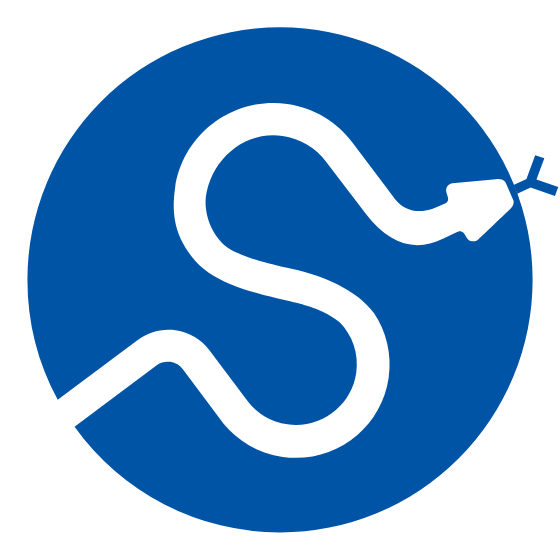

# **Introdução à Estatística**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats as st


## **Média, Mediana e a Moda**

In [ ]:
dados = np.random.randint(0,22,25)
dados


array([ 3,  0,  8,  5,  8, 12,  4, 15,  9, 17,  5, 17, 14,  8,  9, 16, 21,
        2, 10, 11, 16,  1, 12, 19, 19])

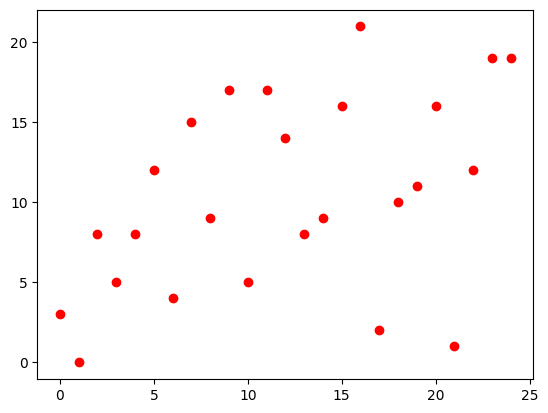

In [ ]:
plt.plot(dados,'ro')

In [ ]:
media_dados = np.mean(dados)
media_dados

10.44

In [ ]:
mediana_dados = np.median(dados)
mediana_dados

10.0

In [ ]:
moda_dados = st.mode(list(dados))
moda_dados

<ipython-input-6-35559d3de651>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda_dados = st.mode(list(dados))


ModeResult(mode=array([8]), count=array([3]))

In [ ]:
novos_dados = np.unique(dados, return_index=True, return_counts=True)
novos_dados

(array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 14, 15, 16, 17, 19, 21]),
 array([ 1, 21, 17,  0,  6,  3,  2,  8, 18, 19,  5, 12,  7, 15,  9, 23, 16]),
 array([1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1]))

# **Medidas de dispersão**

## **Quartis e Percentis**

In [ ]:
quartis_dados = np.quantile(dados,[0.25,0.5])
quartis_dados

array([ 5., 10.])

In [ ]:
percentis_dados = np.percentile(dados,[25,50,75])
percentis_dados

array([ 5., 10., 16.])

## **Desvio padrão, variança**

$$\sigma=\sqrt{\frac{\sum(x_i-\mu)^2}{N}}$$

* $\sigma$ = desvio padrão da população

* $N$ = tamanho da população
* $x_i$ = cada valor da população
* $\mu$ = média da população
* $\sigma^2$ = variança

In [ ]:
desvio_dados = np.std(dados)
desvio_dados

5.97380950483023

In [ ]:
varian_dados = np.var(dados)
varian_dados

35.6864

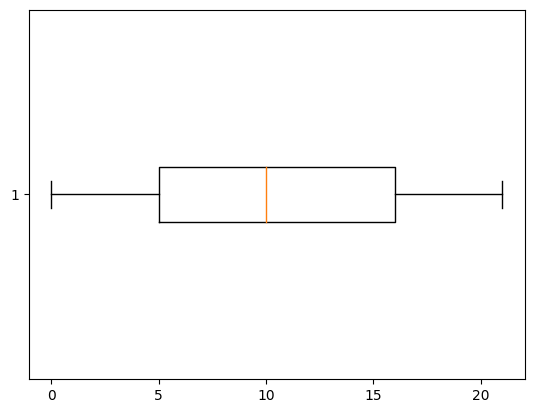

In [ ]:
dados_ordenados = sorted(dados)

plt.boxplot(dados_ordenados, vert=False)

plt.show()

(array([2., 1., 1., 1., 2., 0., 0., 3., 2., 1., 1., 2., 0., 1., 1., 2., 2.,
        0., 2., 1.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <BarContainer object of 20 artists>)

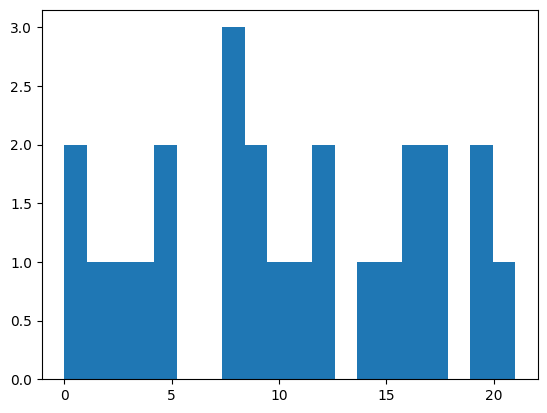

In [ ]:
plt.hist(dados_ordenados,bins=20)

# **Resolvendo Equações Transcendentais**

In [ ]:
from sympy import *

x = symbols('x')

fx = 4*cos(x)-exp(x)
display(fx)
sol = solve(fx,x)
sol

-exp(x) + 4*cos(x)

NotImplementedError: ignored

$$f(x) + g(x) =0  ⟹ g(x)=-f(x)$$

$$-\exp(x)+4\cos(x)=0$$
$$f(x)=-\exp(x)$$
$$g(x)=4\cos(x)$$

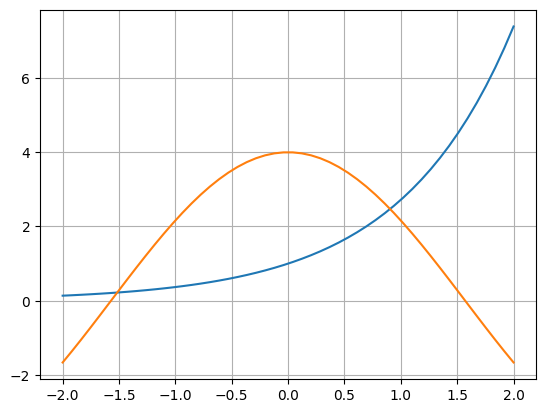

In [ ]:
w = np.linspace(-2,2)

f1 = -np.exp(w)
f2 = 4*np.cos(w)

plt.plot(w,-f1)
plt.plot(w,f2)
plt.grid()

plt.show()

## **Usando métodos do Scipy**

In [ ]:
# Bisecção

from scipy.optimize import *

def f(w):
  return -np.exp(w)+4*np.cos(w)

sol1 = root_scalar(f, bracket=[-2,-1] , method='bisect')
display(sol1)
print()

sol2 = root_scalar(f, bracket=[0.5,1], method='bisect')
sol2

      converged: True
           flag: 'converged'
 function_calls: 41
     iterations: 39
           root: -1.5158641228063061

      converged: True
           flag: 'converged'
 function_calls: 40
     iterations: 38
           root: 0.9047882178729196

In [ ]:
# Secante

def f(w,a,b):
  return a -np.exp(w) + b*np.cos(w)

a = 0 ; b = 4

sols = root_scalar(f, args=(a,b), x0=-2 ,x1=-1.5, method='secant' )
sols

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: -1.51586412280501

[]

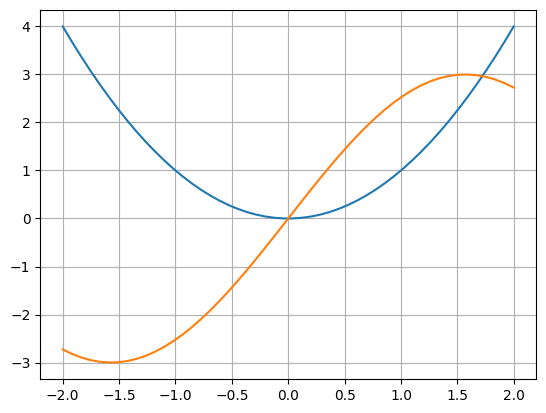

In [ ]:
u = np.linspace(-2,2)

plt.plot(u,u*u)
plt.plot(u,3*np.sin(u))
plt.grid()

plt.plot()

In [ ]:
# Newton-Rapson

# f(x) = x^2 -3*sin(x)

def fnr(u):
  return u**2 - 3*np.sin(u)

def fnr_d(u):
  return 2*u - 3*np.cos(u)

solnr1 = root_scalar(fnr, x0=-0.5, fprime=fnr_d, method='newton')
print(solnr1)

print()

solnr2 = root_scalar(fnr, x0=1.5, fprime=fnr_d, method='newton')
solnr2

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: -2.9582283945787943e-31



      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 5
           root: 1.7221251120767236

# **Integração Numérica**

In [ ]:
r = symbols('r')

integ = integrate(exp(r)*cos(r),r)
display(integ)
print()

integn = integrate(exp(r)*cos(r),(r,0,2))
integn.evalf()


exp(r)*sin(r)/2 + exp(r)*cos(r)/2

1.32195868839445

In [ ]:
from scipy.integrate import quad

def fu(x,c,d):
  return c*np.exp(x)*np.cos(x)+d

c=1 ; d=0

resposta, error = quad(fu, a=0, b=2, args=(c,d))
print(resposta)
print(error)

1.3219586883944454
2.7542372206088174e-14


$$\int_0^1\int_{-\pi}^{\pi} (x^2+\sin(y))dxdy$$

In [ ]:
from scipy.integrate import dblquad

def int2(x,y):
  return x**2 + np.sin(y)

resposta2, erro = dblquad(int2, a=0 , b=1, gfun=-np.pi , hfun = np.pi)
print(resposta2)
print(erro)

23.55921691771352
2.8810937209058345e-13


$$\int_0^1\int_{y=x}^{y=2-x}axydxdy$$

In [ ]:
f = lambda y,x,a: a*x*y

integre, erro = dblquad(f, 0, 1, gfun = lambda x:x , hfun = lambda x:2-x, args=(10,) )

print(integre)
print(erro)

3.333333333333334
5.551115123125783e-14


# **Pandas - Manipulação de DataFrame - Python Data Analysis Library**

----
https://pandas.pydata.org/docs/user_guide/index.html
----
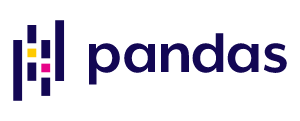


In [ ]:
import pandas as pd
import numpy as np

## **Manipulando Series**

In [ ]:
dat_Series = pd.Series( [ x for x in np.random.random(12) ] )
dat_Series

0     0.189547
1     0.863366
2     0.472982
3     0.471473
4     0.232438
5     0.412571
6     0.653327
7     0.425975
8     0.783939
9     0.100243
10    0.767820
11    0.366962
dtype: float64

In [ ]:
np.exp(dat_Series) + 25

0     26.208702
1     27.371129
2     26.604773
3     26.602352
4     26.261672
5     26.510697
6     26.921924
7     26.531082
8     27.190082
9     26.105439
10    27.155063
11    26.443343
dtype: float64

## **Aplicar função a uma Série**

In [ ]:
dat_Series

0     0.189547
1     0.863366
2     0.472982
3     0.471473
4     0.232438
5     0.412571
6     0.653327
7     0.425975
8     0.783939
9     0.100243
10    0.767820
11    0.366962
dtype: float64

In [ ]:
def func(u):
  if u > 3:
    return 2*u
  else:
    return -3*u

dat_Series.apply(func)

0    -0.568640
1    -2.590099
2    -1.418946
3    -1.414418
4    -0.697315
5    -1.237714
6    -1.959981
7    -1.277925
8    -2.351817
9    -0.300728
10   -2.303459
11   -1.100886
dtype: float64

## **Copiar, Contar e Estatística em Séries**

In [ ]:
dat_novos = dat_Series.copy()
dat_novos[0]

0.18954681471395884

In [ ]:
dat_novos.count()

12

In [ ]:
# Estátistica
dat_novos.describe()

count    12.000000
mean      0.478387
std       0.245400
min       0.100243
25%       0.333331
50%       0.448724
75%       0.681950
max       0.863366
dtype: float64

## **Frequência dos dados**




In [ ]:
dat_novos.value_counts()

0.189547    1
0.863366    1
0.472982    1
0.471473    1
0.232438    1
0.412571    1
0.653327    1
0.425975    1
0.783939    1
0.100243    1
0.767820    1
0.366962    1
dtype: int64

## **Tabelas Dataframe a partir de Séries**

In [ ]:
tab1 = pd.DataFrame( dat_novos , columns = ['valores'])
tab1

,valores
0,0.189547
1,0.863366
2,0.472982
3,0.471473
4,0.232438
5,0.412571
6,0.653327
7,0.425975
8,0.783939
9,0.100243


### **Extrair elemento, adicionar coluna e ordenar tabela**

In [ ]:
tab1['valores'][7]

0.425974876228296

In [ ]:
# Adicionar uma coluna na tabela
tab1['valx10'] = tab1['valores']*10
tab1

,valores,valx10
0,0.189547,1.895468
1,0.863366,8.633663
2,0.472982,4.729822
3,0.471473,4.714727
4,0.232438,2.324382
5,0.412571,4.125713
6,0.653327,6.533270
7,0.425975,4.259749
8,0.783939,7.839391
9,0.100243,1.002426


In [ ]:
# Ordenar valores
tab1.sort_values('valores')

,valores,valx10
9,0.100243,1.002426
0,0.189547,1.895468
4,0.232438,2.324382
11,0.366962,3.669619
5,0.412571,4.125713
7,0.425975,4.259749
3,0.471473,4.714727
2,0.472982,4.729822
6,0.653327,6.533270
10,0.767820,7.678198


In [ ]:
tab1['val**2']=tab1['valores']**2
tab1

,valores,valx10,val**2
0,0.189547,1.895468,0.035928
1,0.863366,8.633663,0.745401
2,0.472982,4.729822,0.223712
3,0.471473,4.714727,0.222286
4,0.232438,2.324382,0.054028
5,0.412571,4.125713,0.170215
6,0.653327,6.533270,0.426836
7,0.425975,4.259749,0.181455
8,0.783939,7.839391,0.614561
9,0.100243,1.002426,0.010049


In [ ]:
# Extrair uma coluna
dadox = tab1['valx10']
dadox

0     1.895468
1     8.633663
2     4.729822
3     4.714727
4     2.324382
5     4.125713
6     6.533270
7     4.259749
8     7.839391
9     1.002426
10    7.678198
11    3.669619
Name: valx10, dtype: float64

In [ ]:
tab1 = tab1.drop(columns=['valx10'], axis=1)
tab1

,valores,val**2
0,0.189547,0.035928
1,0.863366,0.745401
2,0.472982,0.223712
3,0.471473,0.222286
4,0.232438,0.054028
5,0.412571,0.170215
6,0.653327,0.426836
7,0.425975,0.181455
8,0.783939,0.614561
9,0.100243,0.010049


In [ ]:
tab1['int']= [ i for i in np.random.randint(12,size=(12)) ]
tab1

,valores,val**2,int
0,0.189547,0.035928,8
1,0.863366,0.745401,7
2,0.472982,0.223712,2
3,0.471473,0.222286,11
4,0.232438,0.054028,10
5,0.412571,0.170215,10
6,0.653327,0.426836,7
7,0.425975,0.181455,2
8,0.783939,0.614561,10
9,0.100243,0.010049,4


In [ ]:
tab1['bolean'] = tab1['int']%2 == 0
tab1

,valores,val**2,int,bolean
0,0.189547,0.035928,8,True
1,0.863366,0.745401,7,False
2,0.472982,0.223712,2,True
3,0.471473,0.222286,11,False
4,0.232438,0.054028,10,True
5,0.412571,0.170215,10,True
6,0.653327,0.426836,7,False
7,0.425975,0.181455,2,True
8,0.783939,0.614561,10,True
9,0.100243,0.010049,4,True


### **Mapear Colunas**

In [ ]:
tab1['par/impar']=tab1['bolean'].map( { False: 'impar', True: 'par'} )
tab1

,valores,val**2,int,bolean,par/impar
0,0.189547,0.035928,8,True,par
1,0.863366,0.745401,7,False,impar
2,0.472982,0.223712,2,True,par
3,0.471473,0.222286,11,False,impar
4,0.232438,0.054028,10,True,par
5,0.412571,0.170215,10,True,par
6,0.653327,0.426836,7,False,impar
7,0.425975,0.181455,2,True,par
8,0.783939,0.614561,10,True,par
9,0.100243,0.010049,4,True,par


## **Transpor uma tabela**

In [ ]:
tab1.T

,0,1,2,3,4,5,6,7,8,9,10,11
valores,0.189547,0.863366,0.472982,0.471473,0.232438,0.412571,0.653327,0.425975,0.783939,0.100243,0.76782,0.366962
val**2,0.035928,0.745401,0.223712,0.222286,0.054028,0.170215,0.426836,0.181455,0.614561,0.010049,0.589547,0.134661
int,8,7,2,11,10,10,7,2,10,4,0,3
bolean,True,False,True,False,True,True,False,True,True,True,True,False
par/impar,par,impar,par,impar,par,par,impar,par,par,par,par,impar


## **Tabela estatística**

In [ ]:
dados = np.random.randint(1,23,25)
dados

array([15,  6, 13, 13, 13,  6, 18, 17, 14,  9, 10,  2, 20,  4, 20,  5,  9,
        9, 12,  8, 18, 15, 21, 17, 21])

In [ ]:
np.unique(dados,return_index=True,return_counts=True)

(array([ 2,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 17, 18, 20, 21]),
 array([11, 13, 15,  1, 19,  9, 10, 18,  2,  8,  0,  7,  6, 12, 22]),
 array([1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 2, 2]))

In [ ]:
dat, index, freq =  np.unique(dados,return_index=True,return_counts=True)
index

array([11, 13, 15,  1, 19,  9, 10, 18,  2,  8,  0,  7,  6, 12, 22])

In [ ]:
dat_dados = pd.Series(dat).sort_values()
frq_dados = pd.Series(freq)

In [ ]:
# Amplitude de Intervalo

dat_amp = pd.cut( dat_dados, bins = len(index), precision=2, ordered=True )
dat_amp.sort_index()

0       (1.98, 3.27]
1       (3.27, 4.53]
2        (4.53, 5.8]
3        (5.8, 7.07]
4       (7.07, 8.33]
5        (8.33, 9.6]
6       (9.6, 10.87]
7     (10.87, 12.13]
8      (12.13, 13.4]
9      (13.4, 14.67]
10    (14.67, 15.93]
11     (15.93, 17.2]
12     (17.2, 18.47]
13     (19.73, 21.0]
14     (19.73, 21.0]
dtype: category
Categories (15, interval[float64, right]): [(1.98, 3.27] < (3.27, 4.53] < (4.53, 5.8] < (5.8, 7.07] <
                                            ... < (15.93, 17.2] < (17.2, 18.47] <
                                            (18.47, 19.73] < (19.73, 21.0]]

In [ ]:
tab3 = pd.DataFrame(dat_dados,columns=['Dados'])
tab3['Amp._Inter'] = dat_amp.values
tab3['fq']=frq_dados
tab3['F_a']=tab3['fq'].cumsum()
tab3['fq_r(%)']=100*(frq_dados/len(dados))
tab3['Fr_a(%)']=tab3['fq_r(%)'].cumsum()

tab3.loc['Total']=tab3.sum(axis=0,skipna=False,numeric_only=True)

tab3

,Dados,Amp._Inter,fq,F_a,fq_r(%),Fr_a(%)
0,2.0,"(1.98, 3.27]",1.0,1.0,4.0,4.0
1,4.0,"(3.27, 4.53]",1.0,2.0,4.0,8.0
2,5.0,"(4.53, 5.8]",1.0,3.0,4.0,12.0
3,6.0,"(5.8, 7.07]",2.0,5.0,8.0,20.0
4,8.0,"(7.07, 8.33]",1.0,6.0,4.0,24.0
5,9.0,"(8.33, 9.6]",3.0,9.0,12.0,36.0
6,10.0,"(9.6, 10.87]",1.0,10.0,4.0,40.0
7,12.0,"(10.87, 12.13]",1.0,11.0,4.0,44.0
8,13.0,"(12.13, 13.4]",3.0,14.0,12.0,56.0
9,14.0,"(13.4, 14.67]",1.0,15.0,4.0,60.0


In [ ]:
tab3 = pd.DataFrame(dat_dados,columns=['Dados'])
tab3['Amp._Inter'] = dat_amp.values
tab3['fq']=frq_dados
tab3['F_a']=tab3['fq'].cumsum()
tab3['fq_r(%)']=100*(frq_dados/len(dados))
tab3['Fr_a(%)']=tab3['fq_r(%)'].cumsum()
tab3

,Dados,Amp._Inter,fq,F_a,fq_r(%),Fr_a(%)
0,2,"(1.98, 3.27]",1,1,4.0,4.0
1,4,"(3.27, 4.53]",1,2,4.0,8.0
2,5,"(4.53, 5.8]",1,3,4.0,12.0
3,6,"(5.8, 7.07]",2,5,8.0,20.0
4,8,"(7.07, 8.33]",1,6,4.0,24.0
5,9,"(8.33, 9.6]",3,9,12.0,36.0
6,10,"(9.6, 10.87]",1,10,4.0,40.0
7,12,"(10.87, 12.13]",1,11,4.0,44.0
8,13,"(12.13, 13.4]",3,14,12.0,56.0
9,14,"(13.4, 14.67]",1,15,4.0,60.0


In [ ]:
tab3.describe()

,Dados,fq,F_a,fq_r(%),Fr_a(%)
count,15.00000,15.000000,15.000000,15.000000,15.000000
mean,11.60000,1.666667,12.066667,6.666667,48.266667
std,5.94979,0.723747,7.832776,2.894987,31.331104
min,2.00000,1.000000,1.000000,4.000000,4.000000
25%,7.00000,1.000000,5.500000,4.000000,22.000000
50%,12.00000,2.000000,11.000000,8.000000,44.000000
75%,16.00000,2.000000,18.000000,8.000000,72.000000
max,21.00000,3.000000,25.000000,12.000000,100.000000


# **Análise de Dados**

## **Importar arquivos manualmente do Computador**

In [ ]:
from google.colab import files

uploade = files.upload()

# **Importar Dados do Drive**

Excel, csv e planilha google

## **Importar planilha google**

In [ ]:
!pip install --upgrade gspread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


### **Autorização do Drive**

In [ ]:
from google.colab import auth
auth.authenticate_user()

### **Importar o gspread**


In [ ]:
import gspread
from google.auth import default
creds, _ = default()

gs = gspread.authorize(creds)

### **Abrir a planilha google**


In [ ]:
planilha_sisu = gs.open('Alunos-aprovados--UNIFESSPA-SISU-2023')

### **Mostrar as páginas**


In [ ]:
planilha_sisu.worksheets()

[<Worksheet 'listagem-alunos-aprovado-UNIFESSPA-18440-SISU-2023.csv' id:1256903583>]

### **Associar a planilha a uma variável**


In [ ]:
pagina_01 = planilha_sisu.get_worksheet(0)
pagina_01

<Worksheet 'listagem-alunos-aprovado-UNIFESSPA-18440-SISU-2023.csv' id:1256903583>

### **Transformar os dados em Data Frame**

In [ ]:
data_sisu = pd.DataFrame(pagina_01.get_all_records())
data_sisu

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,CO_INSCRICAO_ENEM,NO_INSCRITO,SEXO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
0,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,Campus de Xinguara,1406108,GEOGRAFIA,Noturno,Licenciatura,18,22****315705,RAFAEL SANTOS BARBOSA,M,Ampla concorrência,NÃO,,,664.50,621.14,2
1,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****732475,PAULO JUNIOR WANZELER DAMASCENO,M,Ampla concorrência,NÃO,,,721.90,621.63,2
2,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115132,QUÍMICA,Vespertino,Licenciatura,18,22****561869,JOSE DE SOUSA ROLIM NETO,M,Ampla concorrência,NÃO,,,715.89,656.71,2
3,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115162,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,22****600141,JOAO LUIZ DOS SANTOS MAURI,M,Ampla concorrência,NÃO,,,673.02,655.12,4
4,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****820191,JOAQUIM FERNANDES EIRAS NETO,M,Ampla concorrência,NÃO,,,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE III,1262447,ARTES VISUAIS,Vespertino,Licenciatura,2,22****733901,MARCOS FRED SOUSA DA SILVA,M,Pessoa Com Deficiência,NÃO,,,503.86,503.86,2
1345,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE II,86322,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,22****814744,ALVARO VICTOR DE SOUZA BARROS,M,Pessoa Com Deficiência,NÃO,,,520.33,520.33,2
1346,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1483808,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,22****237820,HIANNE LIMA CORREA,F,Pessoa Com Deficiência,NÃO,,,660.79,660.79,2
1347,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,12076,PEDAGOGIA,Noturno,Licenciatura,2,22****640444,MARIA CLARA BRASIL DA SILVA,F,Pessoa Com Deficiência,NÃO,,,524.74,524.74,2


In [ ]:
data_sisu.tail()

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,CO_INSCRICAO_ENEM,NO_INSCRITO,SEXO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
1344,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE III,1262447,ARTES VISUAIS,Vespertino,Licenciatura,2,22****733901,MARCOS FRED SOUSA DA SILVA,M,Pessoa Com Deficiência,NÃO,,,503.86,503.86,2
1345,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE II,86322,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,22****814744,ALVARO VICTOR DE SOUZA BARROS,M,Pessoa Com Deficiência,NÃO,,,520.33,520.33,2
1346,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1483808,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,22****237820,HIANNE LIMA CORREA,F,Pessoa Com Deficiência,NÃO,,,660.79,660.79,2
1347,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,12076,PEDAGOGIA,Noturno,Licenciatura,2,22****640444,MARIA CLARA BRASIL DA SILVA,F,Pessoa Com Deficiência,NÃO,,,524.74,524.74,2
1348,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,1191238,CIÊNCIAS SOCIAIS,Noturno,Bacharelado,2,22****959694,EDUARDA BEATRIZ DA SILVA BRAGA,F,Pessoa Com Deficiência,NÃO,,,485.96,485.96,2


## **Importando Arquivo CSV**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
caminho = '/content/drive/MyDrive/Colab Notebooks/Projeto-MatPhy/PhyMath-Modulo_02/Codes/Alunos-aprovados--UNIFESSPA-SISU-2023.csv'
df_csv_sisu = pd.read_csv(caminho, sep=';', decimal=',', encoding='utf-8')


In [ ]:
df_csv_sisu

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,CO_INSCRICAO_ENEM,NO_INSCRITO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
0,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,Campus de Xinguara,1406108,GEOGRAFIA,Noturno,Licenciatura,18,22****315705,RAFAEL SANTOS BARBOSA,Ampla concorrência,NÃO,NaN,NaN,664.50,621.14,2
1,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****732475,PAULO JUNIOR WANZELER DAMASCENO,Ampla concorrência,NÃO,NaN,NaN,721.90,621.63,2
2,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115132,QUÍMICA,Vespertino,Licenciatura,18,22****561869,JOSE DE SOUSA ROLIM NETO,Ampla concorrência,NÃO,NaN,NaN,715.89,656.71,2
3,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115162,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,22****600141,JOAO LUIZ DOS SANTOS MAURI,Ampla concorrência,NÃO,NaN,NaN,673.02,655.12,4
4,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****820191,JOAQUIM FERNANDES EIRAS NETO,Ampla concorrência,NÃO,NaN,NaN,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE III,1262447,ARTES VISUAIS,Vespertino,Licenciatura,2,22****733901,MARCOS FRED SOUSA DA SILVA,Pessoa Com Deficiência,NÃO,NaN,NaN,503.86,503.86,2
1345,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE II,86322,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,22****814744,ALVARO VICTOR DE SOUZA BARROS,Pessoa Com Deficiência,NÃO,NaN,NaN,520.33,520.33,2
1346,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1483808,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,22****237820,HIANNE LIMA CORREA,Pessoa Com Deficiência,NÃO,NaN,NaN,660.79,660.79,2
1347,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,12076,PEDAGOGIA,Noturno,Licenciatura,2,22****640444,MARIA CLARA BRASIL DA SILVA,Pessoa Com Deficiência,NÃO,NaN,NaN,524.74,524.74,2


## **Importando Arquivo Excel**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Projeto-MatPhy/PhyMath-Modulo_02/Codes/Alunos-aprovados--UNIFESSPA-SISU-2023.xlsx'
df_sisu_excel = pd.read_excel(path,header=0)
df_sisu_excel

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,CO_INSCRICAO_ENEM,NO_INSCRITO,SEXO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
0,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,Campus de Xinguara,1406108,GEOGRAFIA,Noturno,Licenciatura,18,22****315705,RAFAEL SANTOS BARBOSA,M,Ampla concorrência,NÃO,NaN,NaN,664.50,621.14,2
1,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****732475,PAULO JUNIOR WANZELER DAMASCENO,M,Ampla concorrência,NÃO,NaN,NaN,721.90,621.63,2
2,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115132,QUÍMICA,Vespertino,Licenciatura,18,22****561869,JOSE DE SOUSA ROLIM NETO,M,Ampla concorrência,NÃO,NaN,NaN,715.89,656.71,2
3,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115162,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,22****600141,JOAO LUIZ DOS SANTOS MAURI,M,Ampla concorrência,NÃO,NaN,NaN,673.02,655.12,4
4,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****820191,JOAQUIM FERNANDES EIRAS NETO,M,Ampla concorrência,NÃO,NaN,NaN,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE III,1262447,ARTES VISUAIS,Vespertino,Licenciatura,2,22****733901,MARCOS FRED SOUSA DA SILVA,M,Pessoa Com Deficiência,NÃO,NaN,NaN,503.86,503.86,2
1345,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE II,86322,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,22****814744,ALVARO VICTOR DE SOUZA BARROS,M,Pessoa Com Deficiência,NÃO,NaN,NaN,520.33,520.33,2
1346,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1483808,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,22****237820,HIANNE LIMA CORREA,F,Pessoa Com Deficiência,NÃO,NaN,NaN,660.79,660.79,2
1347,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,12076,PEDAGOGIA,Noturno,Licenciatura,2,22****640444,MARIA CLARA BRASIL DA SILVA,F,Pessoa Com Deficiência,NÃO,NaN,NaN,524.74,524.74,2


# **Análise dos dados**

## **Informações básicas**

In [ ]:
df_sisu_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO_IES                      1349 non-null   int64  
 1   NO_IES                      1349 non-null   object 
 2   SG_IES                      1349 non-null   object 
 3   SG_UF_IES                   1349 non-null   object 
 4   NO_CAMPUS                   1349 non-null   object 
 5   CO_IES_CURSO                1349 non-null   int64  
 6   NO_CURSO                    1349 non-null   object 
 7   DS_TURNO                    1349 non-null   object 
 8   DS_FORMACAO                 1349 non-null   object 
 9   QT_VAGAS_CONCORRENCIA       1349 non-null   int64  
 10  CO_INSCRICAO_ENEM           1349 non-null   object 
 11  NO_INSCRITO                 1349 non-null   object 
 12  SEXO                        1349 non-null   object 
 13  NO_MODALIDADE_CONCORRENCIA  1349 

## **Substituir NaN por outro valor**


In [ ]:
df_sisu_excel['QT_BONUS_PERC'].fillna(0,inplace=True)
df_sisu_excel

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,CO_INSCRICAO_ENEM,NO_INSCRITO,SEXO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
0,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,Campus de Xinguara,1406108,GEOGRAFIA,Noturno,Licenciatura,18,22****315705,RAFAEL SANTOS BARBOSA,M,Ampla concorrência,NÃO,0.0,NaN,664.50,621.14,2
1,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****732475,PAULO JUNIOR WANZELER DAMASCENO,M,Ampla concorrência,NÃO,0.0,NaN,721.90,621.63,2
2,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115132,QUÍMICA,Vespertino,Licenciatura,18,22****561869,JOSE DE SOUSA ROLIM NETO,M,Ampla concorrência,NÃO,0.0,NaN,715.89,656.71,2
3,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,115162,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,22****600141,JOAO LUIZ DOS SANTOS MAURI,M,Ampla concorrência,NÃO,0.0,NaN,673.02,655.12,4
4,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1270326,MATEMÁTICA,Noturno,Licenciatura,13,22****820191,JOAQUIM FERNANDES EIRAS NETO,M,Ampla concorrência,NÃO,0.0,NaN,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE III,1262447,ARTES VISUAIS,Vespertino,Licenciatura,2,22****733901,MARCOS FRED SOUSA DA SILVA,M,Pessoa Com Deficiência,NÃO,0.0,NaN,503.86,503.86,2
1345,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE II,86322,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,22****814744,ALVARO VICTOR DE SOUZA BARROS,M,Pessoa Com Deficiência,NÃO,0.0,NaN,520.33,520.33,2
1346,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,SANTANA DO ARAGUAIA,1483808,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,22****237820,HIANNE LIMA CORREA,F,Pessoa Com Deficiência,NÃO,0.0,NaN,660.79,660.79,2
1347,18440,UNIVERSIDADE FEDERAL DO SUL E SUDESTE DO PARÁ,UNIFESSPA,PA,CAMPUS DE MARABÁ - UNIDADE I,12076,PEDAGOGIA,Noturno,Licenciatura,2,22****640444,MARIA CLARA BRASIL DA SILVA,F,Pessoa Com Deficiência,NÃO,0.0,NaN,524.74,524.74,2


## **Selecionar algumas Colunas do arquivo**

In [ ]:
df_sisu_excel.columns

Index(['CO_IES', 'NO_IES', 'SG_IES', 'SG_UF_IES', 'NO_CAMPUS', 'CO_IES_CURSO',
       'NO_CURSO', 'DS_TURNO', 'DS_FORMACAO', 'QT_VAGAS_CONCORRENCIA',
       'CO_INSCRICAO_ENEM', 'NO_INSCRITO', 'SEXO',
       'NO_MODALIDADE_CONCORRENCIA', 'ST_BONUS_PERC', 'QT_BONUS_PERC',
       'NO_ACAO_AFIRMATIVA_BONUS', 'NU_NOTA_CANDIDATO',
       'NU_NOTACORTE_CONCORRIDA', 'NU_CLASSIFICACAO'],
      dtype='object')

In [ ]:
selec = ['NO_CAMPUS', 'NO_CURSO', 'DS_TURNO', 'DS_FORMACAO', 'QT_VAGAS_CONCORRENCIA', 'SEXO',
        'NU_NOTA_CANDIDATO', 'NU_NOTACORTE_CONCORRIDA', 'NU_CLASSIFICACAO']

df_sisu_excel_selec = df_sisu_excel.filter(items=selec)
df_sisu_excel_selec

,NO_CAMPUS,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,SEXO,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO
0,Campus de Xinguara,GEOGRAFIA,Noturno,Licenciatura,18,M,664.50,621.14,2
1,SANTANA DO ARAGUAIA,MATEMÁTICA,Noturno,Licenciatura,13,M,721.90,621.63,2
2,CAMPUS DE MARABÁ - UNIDADE I,QUÍMICA,Vespertino,Licenciatura,18,M,715.89,656.71,2
3,CAMPUS DE MARABÁ - UNIDADE I,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,M,673.02,655.12,4
4,SANTANA DO ARAGUAIA,MATEMÁTICA,Noturno,Licenciatura,13,M,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...
1344,CAMPUS DE MARABÁ - UNIDADE III,ARTES VISUAIS,Vespertino,Licenciatura,2,M,503.86,503.86,2
1345,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,M,520.33,520.33,2
1346,SANTANA DO ARAGUAIA,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,F,660.79,660.79,2
1347,CAMPUS DE MARABÁ - UNIDADE I,PEDAGOGIA,Noturno,Licenciatura,2,F,524.74,524.74,2


## **Trocar o nome das colunas**

In [ ]:
df_sisu_excel_selec.rename(
    columns= {'QT_VAGAS_CONCORRENCIA':'VAGAS','NU_NOTA_CANDIDATO':\
              'NOTA', 'NU_NOTACORTE_CONCORRIDA':'N_CORTE',
              'NU_CLASSIFICACAO':'CLASSIFIC','DS_FORMACAO':'TIPO'}, inplace=True
)
df_sisu_excel_selec

,NO_CAMPUS,NO_CURSO,DS_TURNO,TIPO,VAGAS,SEXO,NOTA,N_CORTE,CLASSIFIC
0,Campus de Xinguara,GEOGRAFIA,Noturno,Licenciatura,18,M,664.50,621.14,2
1,SANTANA DO ARAGUAIA,MATEMÁTICA,Noturno,Licenciatura,13,M,721.90,621.63,2
2,CAMPUS DE MARABÁ - UNIDADE I,QUÍMICA,Vespertino,Licenciatura,18,M,715.89,656.71,2
3,CAMPUS DE MARABÁ - UNIDADE I,CIÊNCIAS NATURAIS,Matutino,Licenciatura,13,M,673.02,655.12,4
4,SANTANA DO ARAGUAIA,MATEMÁTICA,Noturno,Licenciatura,13,M,662.92,621.63,4
...,...,...,...,...,...,...,...,...,...
1344,CAMPUS DE MARABÁ - UNIDADE III,ARTES VISUAIS,Vespertino,Licenciatura,2,M,503.86,503.86,2
1345,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,M,520.33,520.33,2
1346,SANTANA DO ARAGUAIA,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,F,660.79,660.79,2
1347,CAMPUS DE MARABÁ - UNIDADE I,PEDAGOGIA,Noturno,Licenciatura,2,F,524.74,524.74,2


In [ ]:
df_sisu_excel_selec.TIPO.value_counts()

Bacharelado     786
Licenciatura    563
Name: TIPO, dtype: int64

In [ ]:
df_sisu_excel_selec.query('TIPO == "Bacharelado"')

,NO_CAMPUS,NO_CURSO,DS_TURNO,TIPO,VAGAS,SEXO,NOTA,N_CORTE,CLASSIFIC
11,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA DE MATERIAIS,Integral,Bacharelado,13,M,733.22,717.12,9
18,CAMPUS DE MARABÁ - UNIDADE I,GEOGRAFIA,Matutino,Bacharelado,18,M,665.61,656.97,15
22,CAMPUS DE MARABÁ - UNIDADE I,DIREITO,Integral,Bacharelado,7,M,725.62,689.74,1
23,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA QUÍMICA,Integral,Bacharelado,6,M,704.08,615.35,1
24,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA DE MATERIAIS,Integral,Bacharelado,6,M,626.80,573.42,1
...,...,...,...,...,...,...,...,...,...
1341,Campus de São Félix do Xingu,ENGENHARIA FLORESTAL,Integral,Bacharelado,2,F,441.80,441.80,2
1342,Campus de Xinguara,ZOOTECNIA,Integral,Bacharelado,2,F,512.17,512.17,2
1345,CAMPUS DE MARABÁ - UNIDADE II,ENGENHARIA DE MINAS E MEIO AMBIENTE,Integral,Bacharelado,2,M,520.33,520.33,2
1346,SANTANA DO ARAGUAIA,ARQUITETURA E URBANISMO,Integral,Bacharelado,2,F,660.79,660.79,2


In [ ]:
df_sisu_excel_selec.DS_TURNO.value_counts()

Integral      613
Noturno       392
Matutino      217
Vespertino    127
Name: DS_TURNO, dtype: int64

Gráfico

<Axes: >

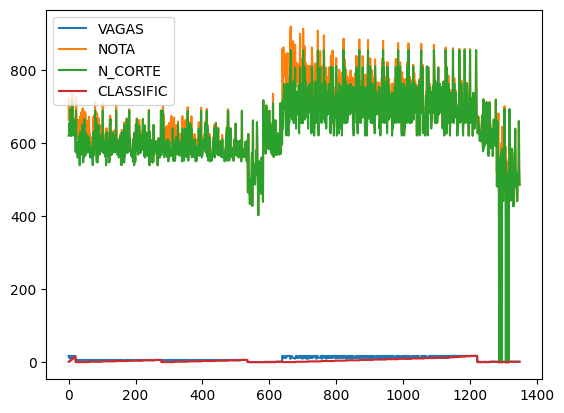

In [ ]:
df_sisu_excel_selec.plot()

### **Gráfico de Pizza**

In [ ]:
dat_pie = df_sisu_excel_selec['DS_TURNO'].value_counts().rename_axis('Tipo').\
reset_index(name='counts')
dat_pie.head()

,Tipo,counts
0,Integral,613
1,Noturno,392
2,Matutino,217
3,Vespertino,127


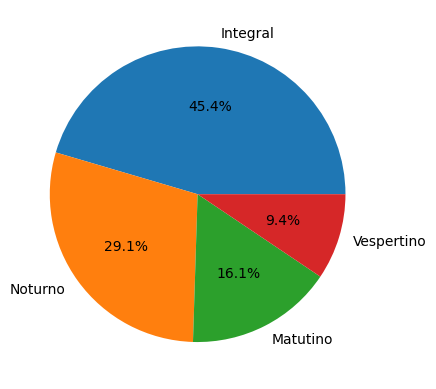

In [ ]:
import matplotlib.pyplot as plt

values = dat_pie.counts
labels = dat_pie.Tipo

fig, ax1 = plt.subplots()

ax1.pie(values,labels=labels,autopct='%1.1f%%' )

plt.show()